In [24]:
install.packages("ggrepel") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [71]:
install.packages("ez", dependencies = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [102]:
library("ggplot2")
library("ggrepel")
library(ez)
library(scales) 
library(tidyr)

In [104]:
housing <- read.csv("/Users/vanshika/Desktop/Data Intensive Computing/Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5]) #number of columns
head(housing)

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

State region Date    Home.Value Structure.Cost Land.Value Land.Share..Pct.
1 AK    West   2010.25 224952     160599         64352      28.6            
2 AK    West   2010.50 225511     160252         65259      28.9            
3 AK    West   2009.75 225820     163791         62029      27.5            
4 AK    West   2010.00 224994     161787         63207      28.1            
5 AK    West   2008.00 234590     155400         79190      33.8            
6 AK    West   2008.25 233714     157458         76256      32.6            
  Home.Price.Index Land.Price.Index Year Qrtr
1 1.481            1.552            2010 1   
2 1.484            1.576            2010 2   
3 1.486            1.494            2009 3   
4 1.481            1.524            2009 4   
5 1.544            1.885            2007 4   
6 1.538            1.817            2008 1

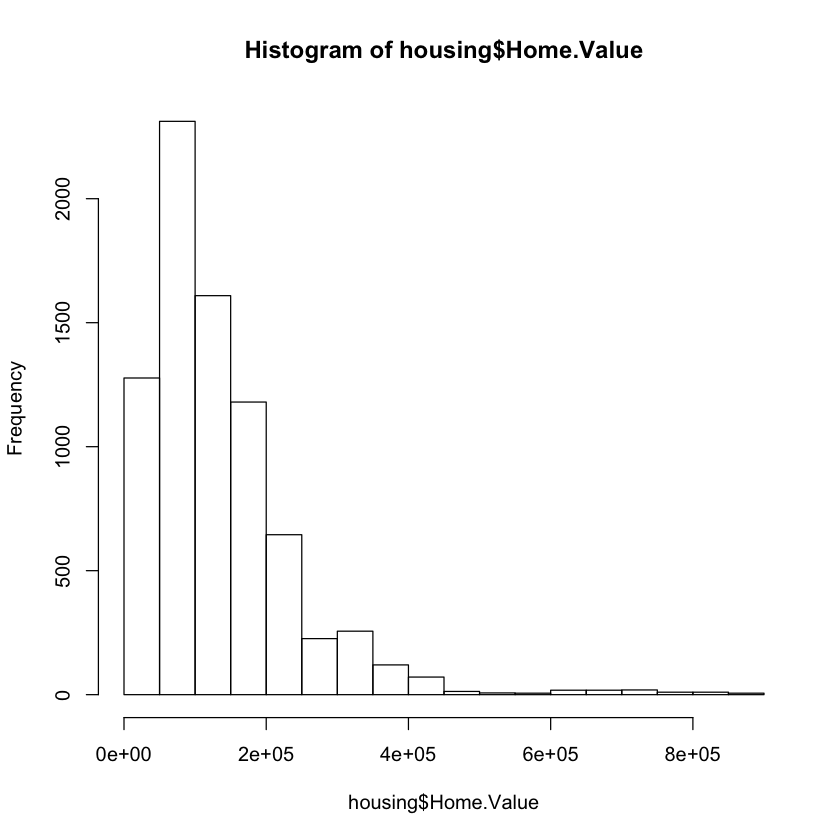

In [8]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


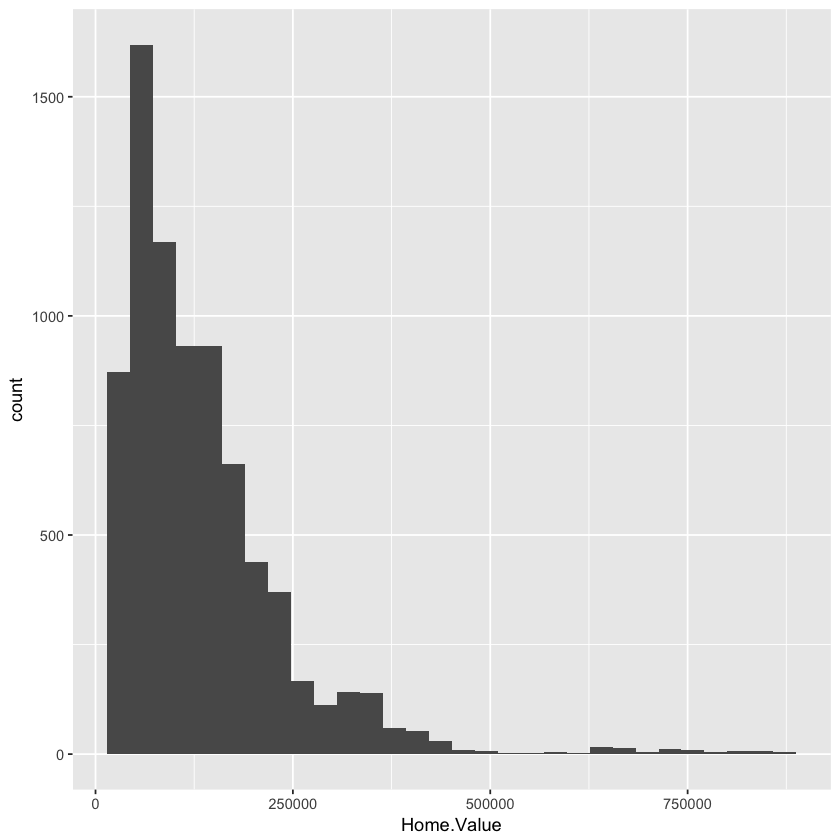

In [9]:
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

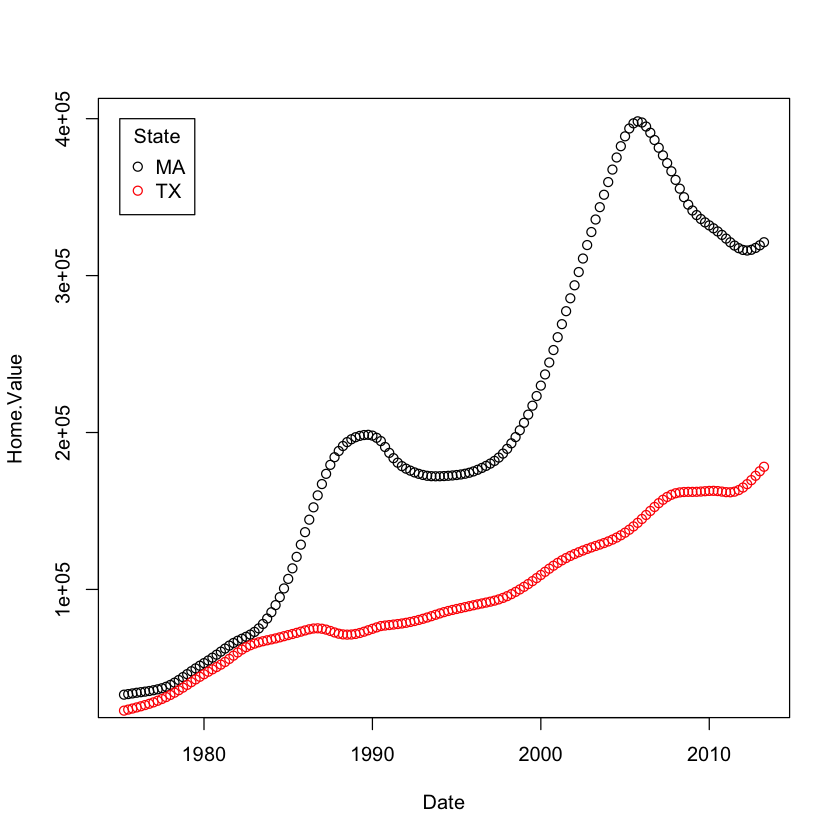

In [10]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

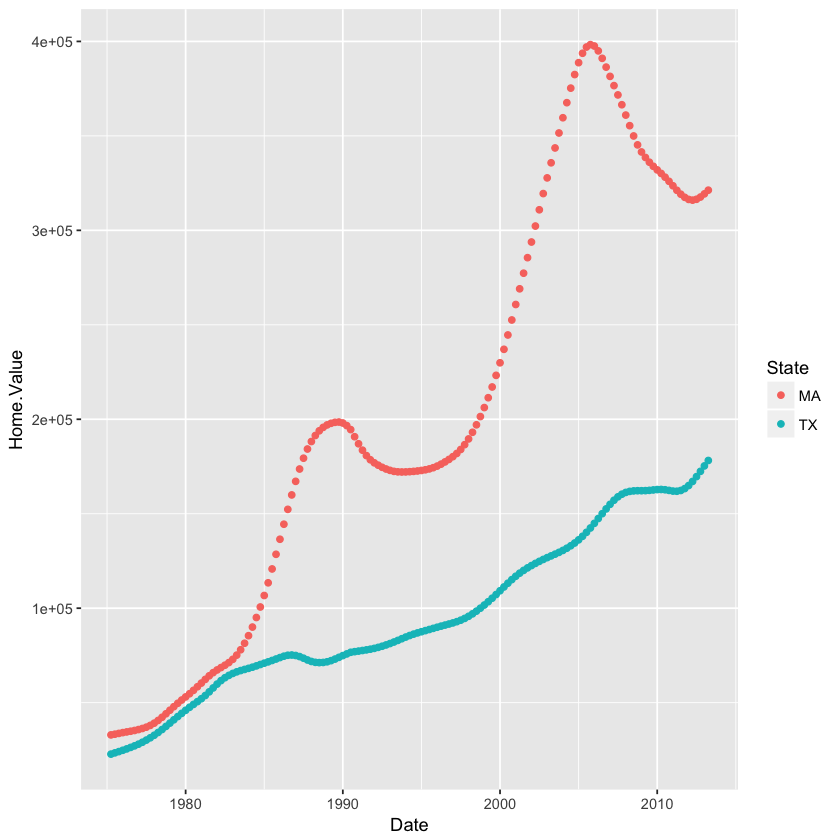

In [13]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

In [15]:
#help.search("geom_", package = "ggplot2")

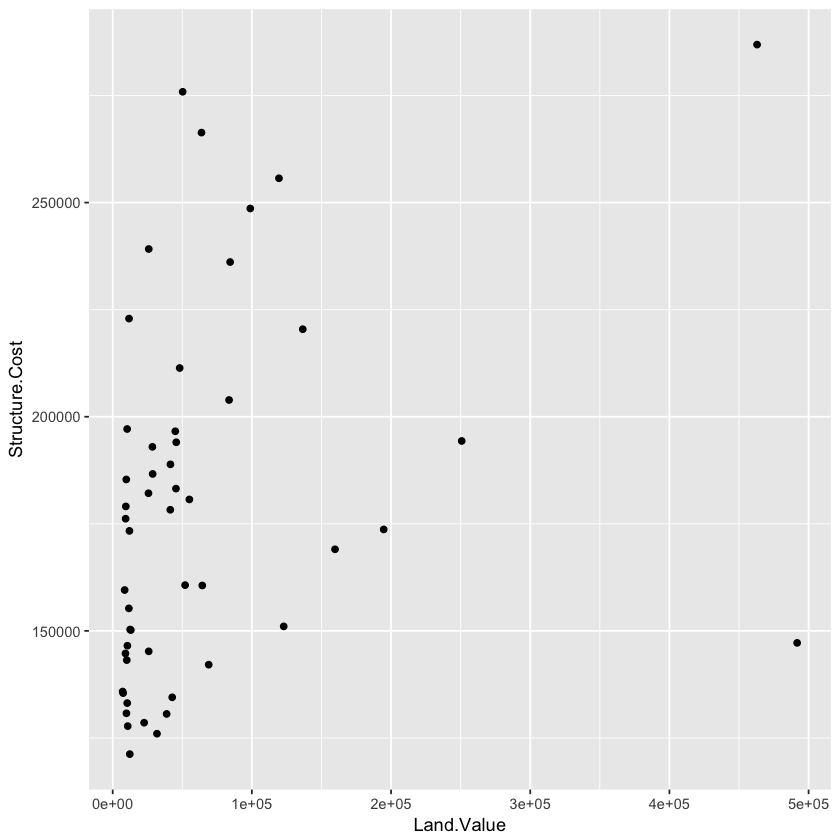

In [17]:
hp2001Q1 <- subset(housing, Date == 2010.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

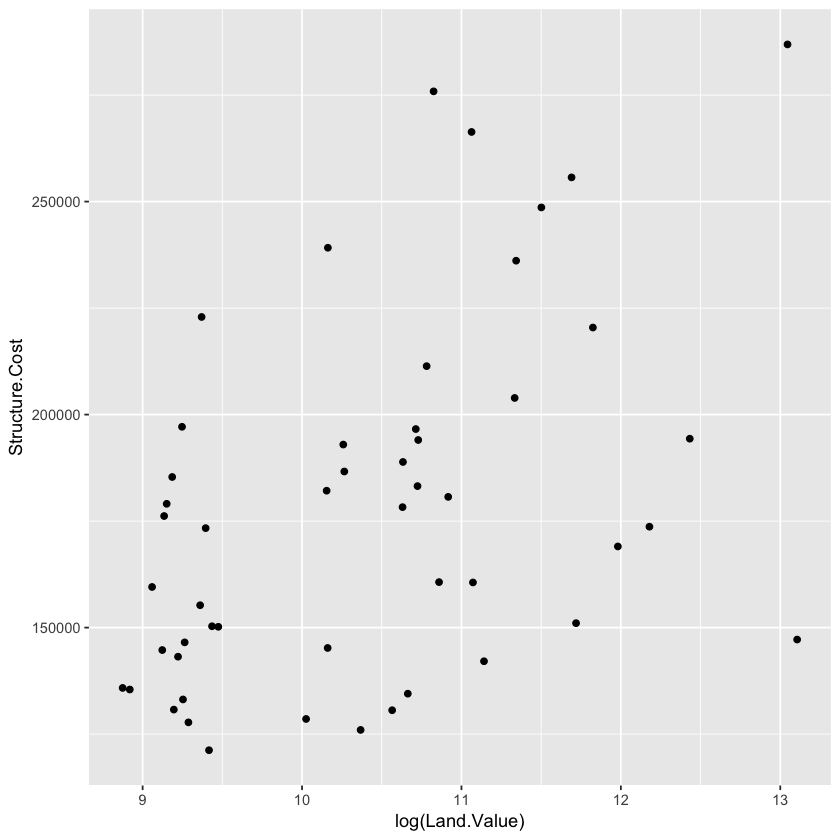

In [19]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

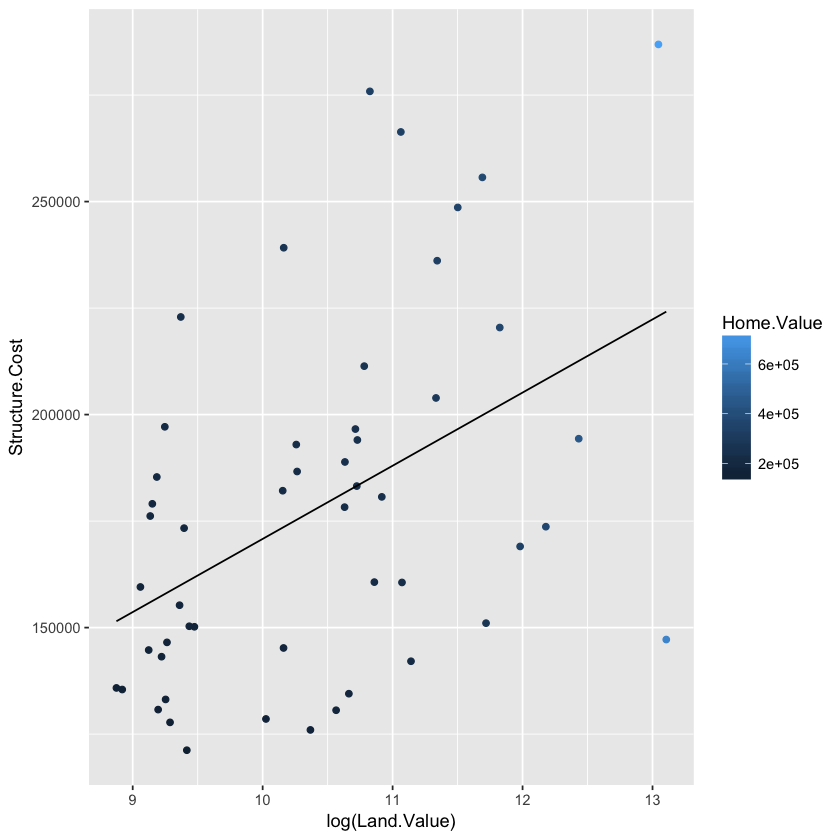

In [18]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


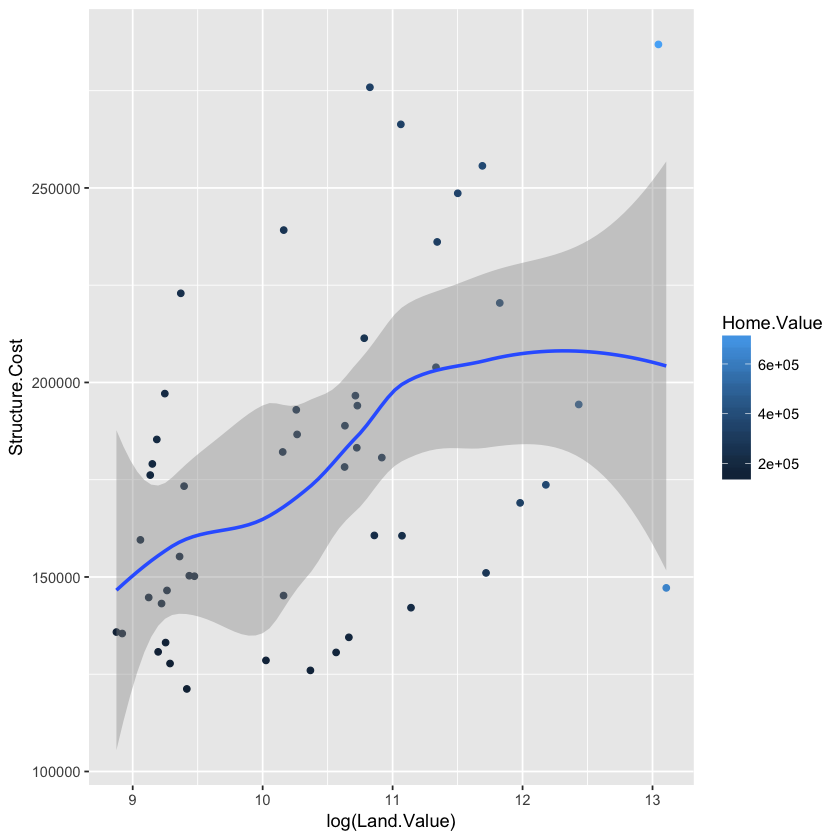

In [20]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

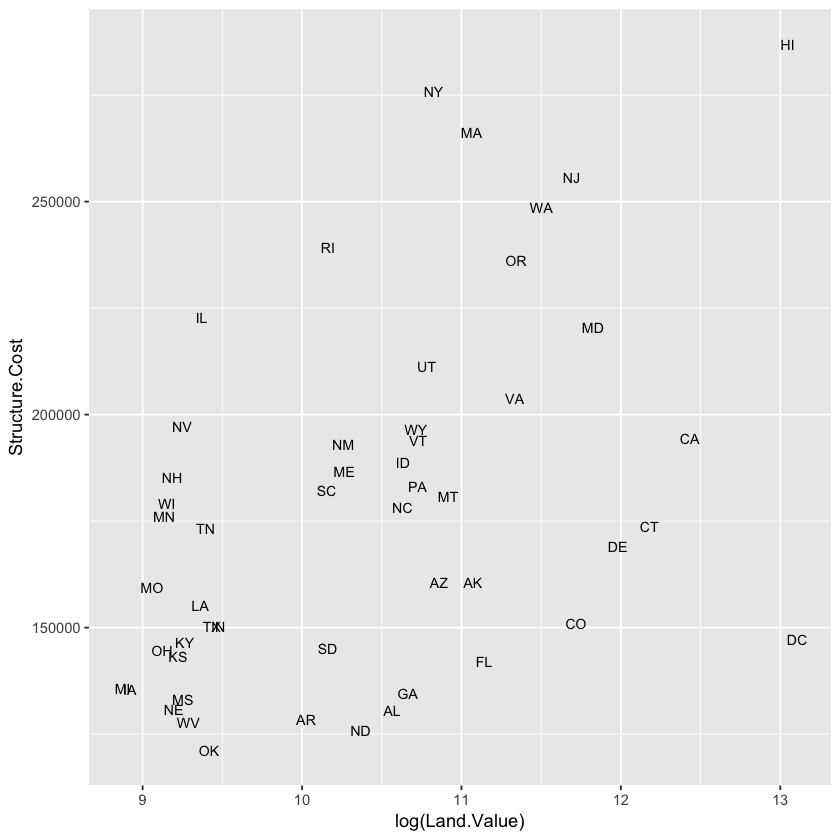

In [23]:
p1 + 
  geom_text(aes(label=State), size = 3)

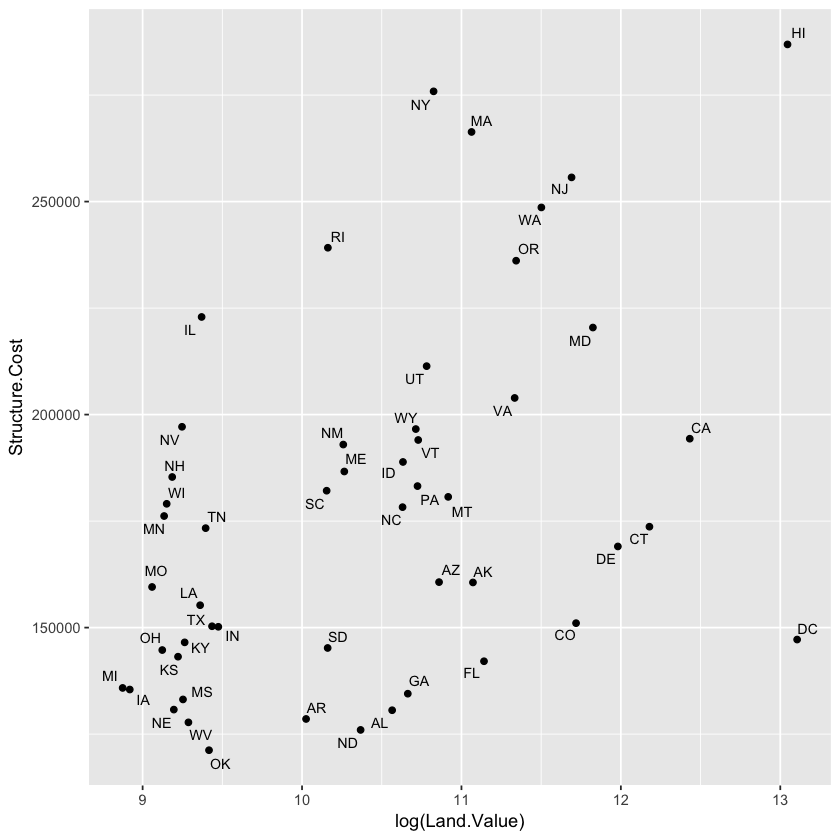

In [26]:
p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

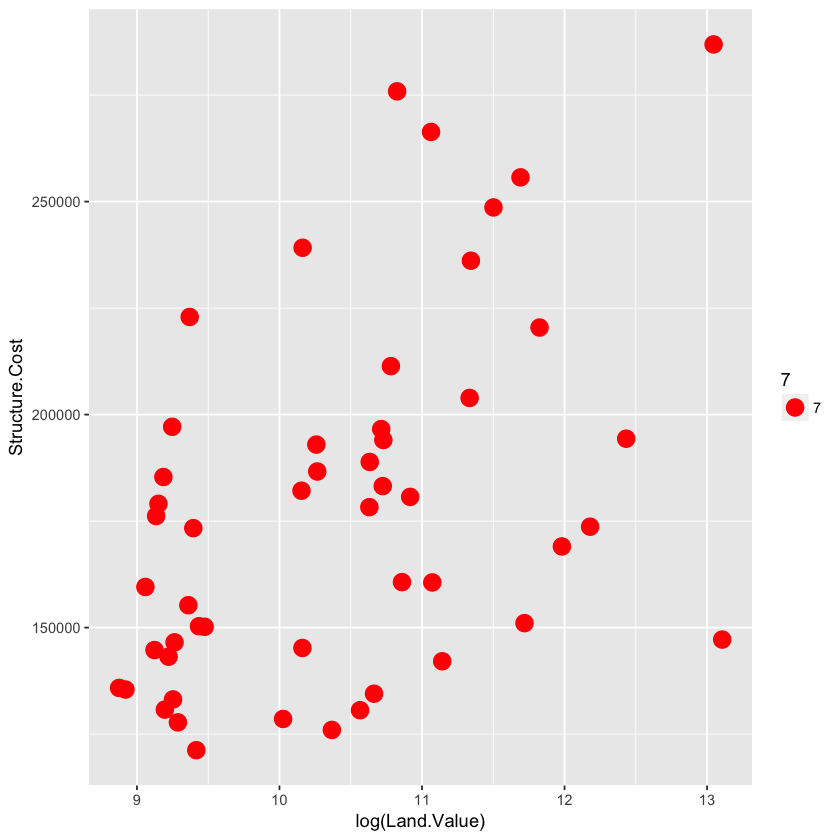

In [28]:
p1 +
  geom_point(aes(size = 7),
             color="red") 

Warning message:
“Removed 1 rows containing missing values (geom_point).”

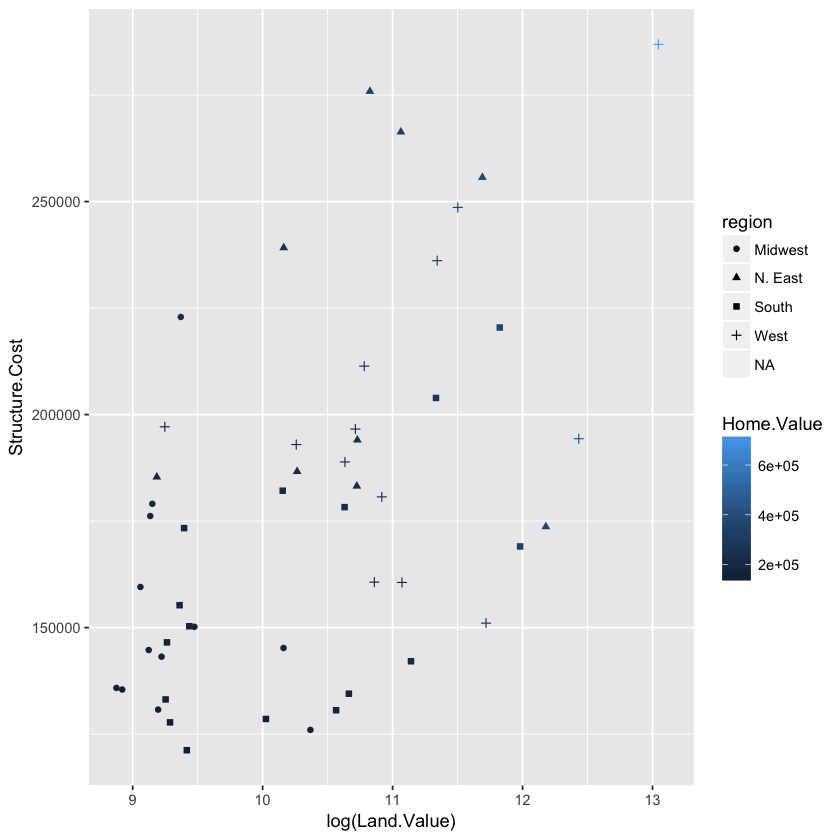

In [29]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

Exercise I

In [31]:
dat <- read.csv("/Users/vanshika/Desktop/Data Intensive Computing/Rgraphics/dataSets/EconomistData.csv")
head(dat,10)


X  Country     HDI.Rank HDI   CPI Region           
1   1 Afghanistan 172      0.398 1.5 Asia Pacific     
2   2 Albania      70      0.739 3.1 East EU Cemt Asia
3   3 Algeria      96      0.698 2.9 MENA             
4   4 Angola      148      0.486 2.0 SSA              
5   5 Argentina    45      0.797 3.0 Americas         
6   6 Armenia      86      0.716 2.6 East EU Cemt Asia
7   7 Australia     2      0.929 8.8 Asia Pacific     
8   8 Austria      19      0.885 7.8 EU W. Europe     
9   9 Azerbaijan   91      0.700 2.4 East EU Cemt Asia
10 10 Bahamas      53      0.771 7.3 Americas

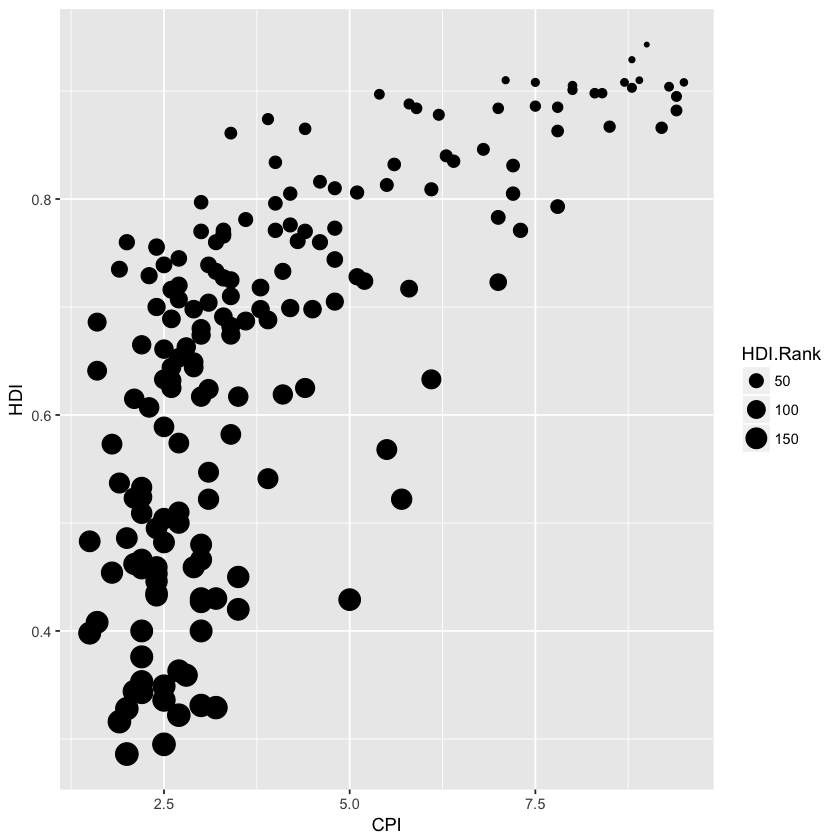

In [37]:
ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point()

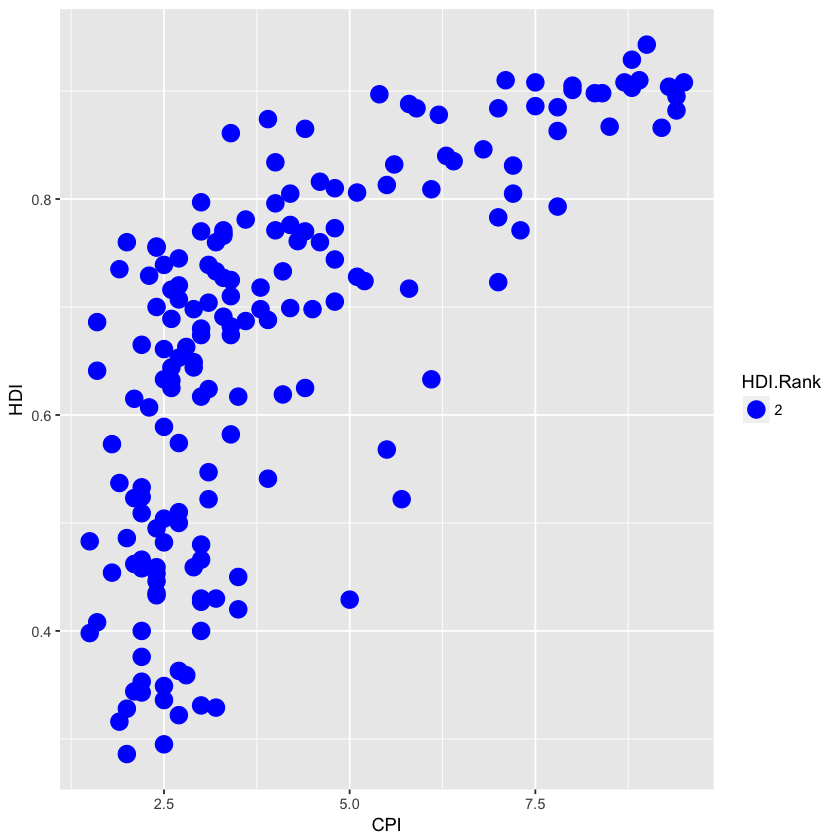

In [39]:
ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(color='blue',aes(size=2))

Each geom has a default statistic, but these can be changed

In [49]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

Setting Statistical Transformation Arguments

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


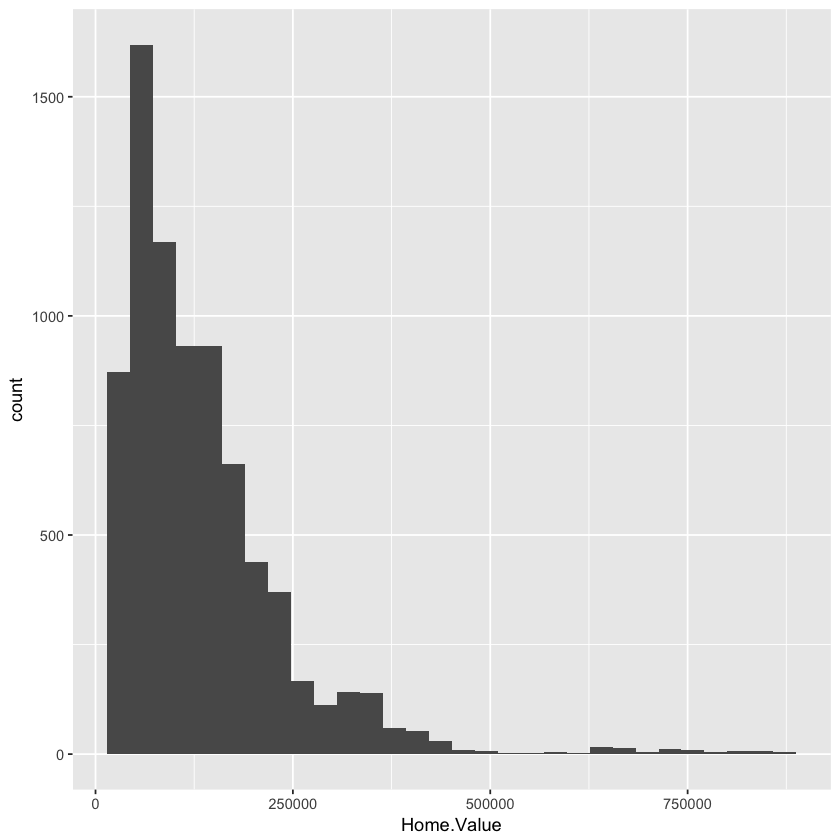

In [42]:
#default histogram of Home.Value:

p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

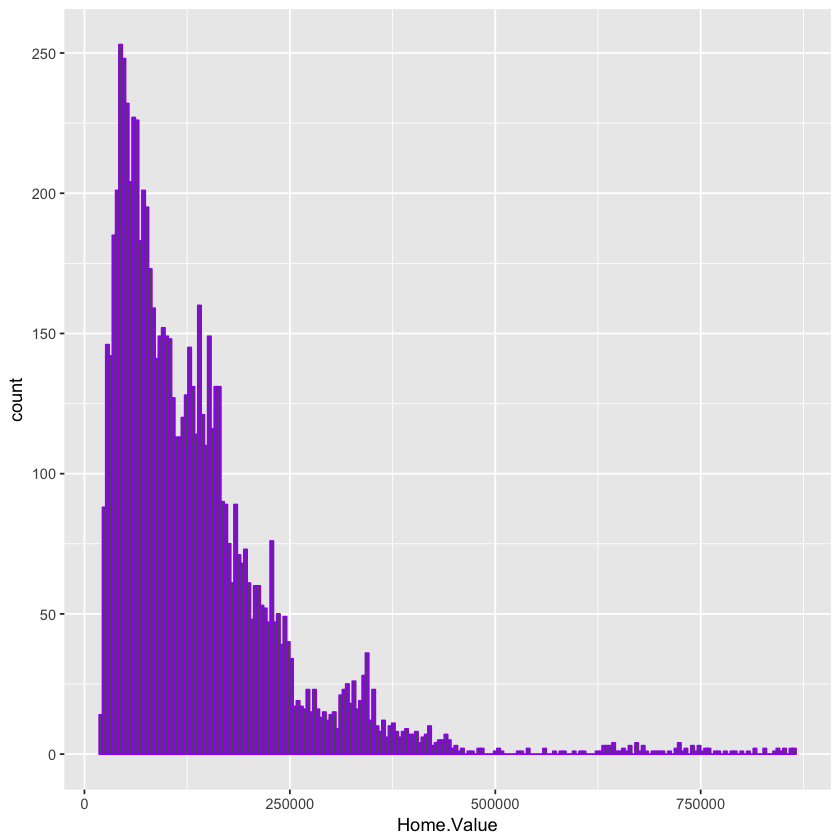

In [47]:
p2 + geom_histogram(stat = "bin", binwidth=4000, colour="purple")

Changing The Statistical Transformation

In [50]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

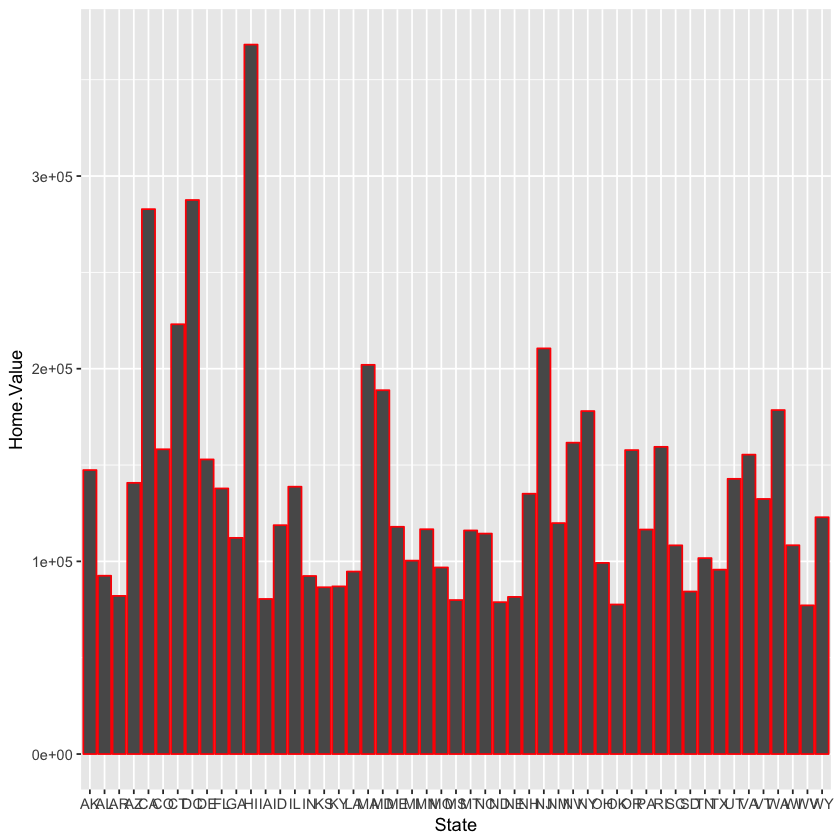

In [55]:
#ggplot(housing.sum, aes(x=State, y=Home.Value)) + geom_bar()
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity", colour="red")

Scale Modification Examples

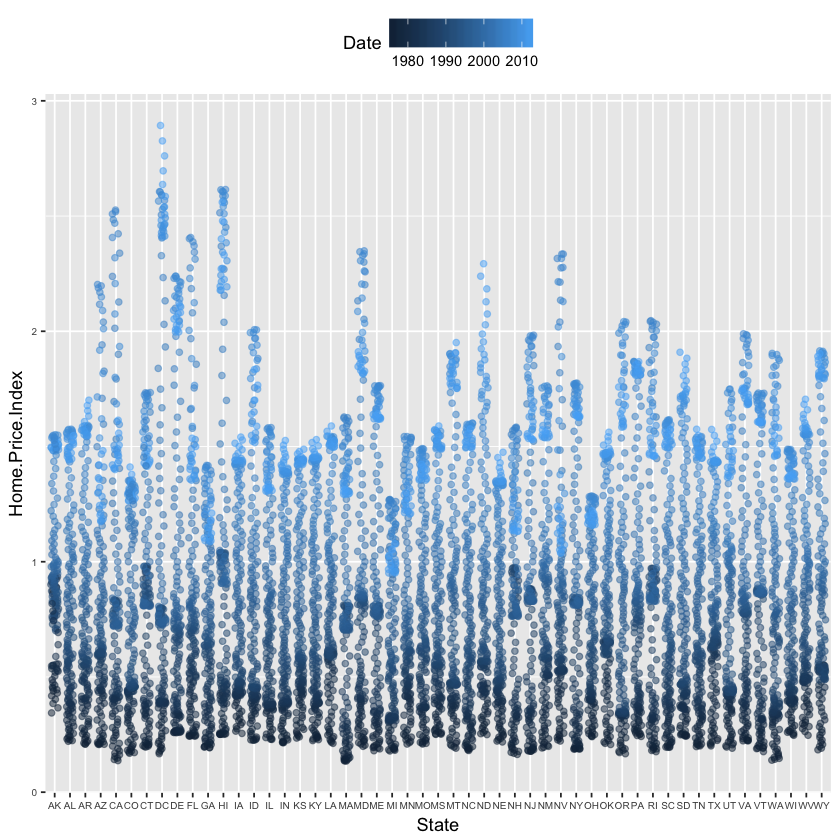

In [56]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

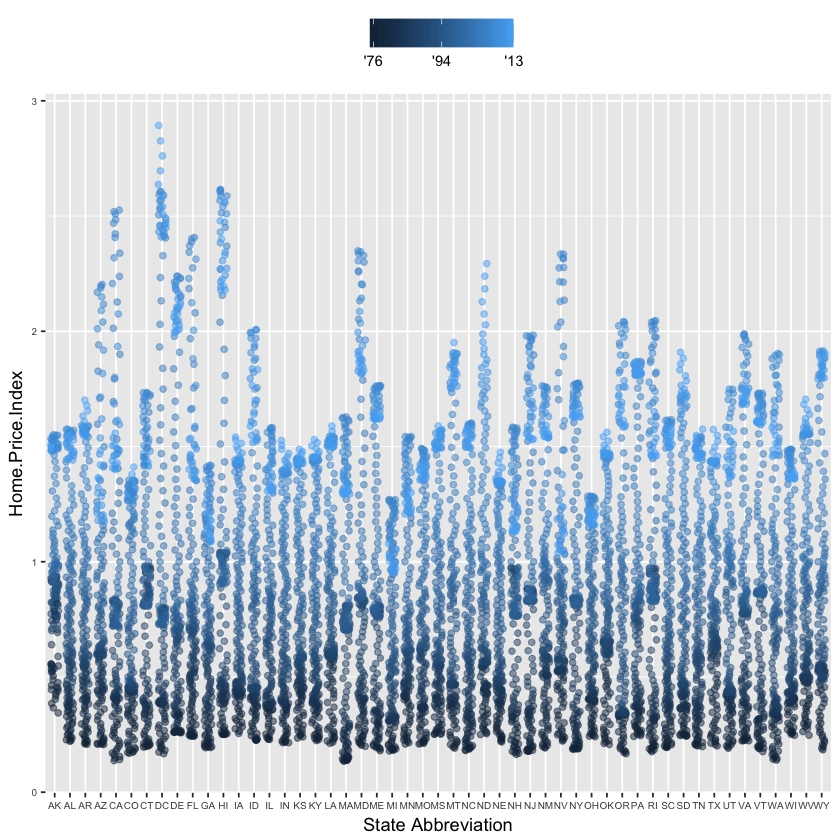

In [60]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

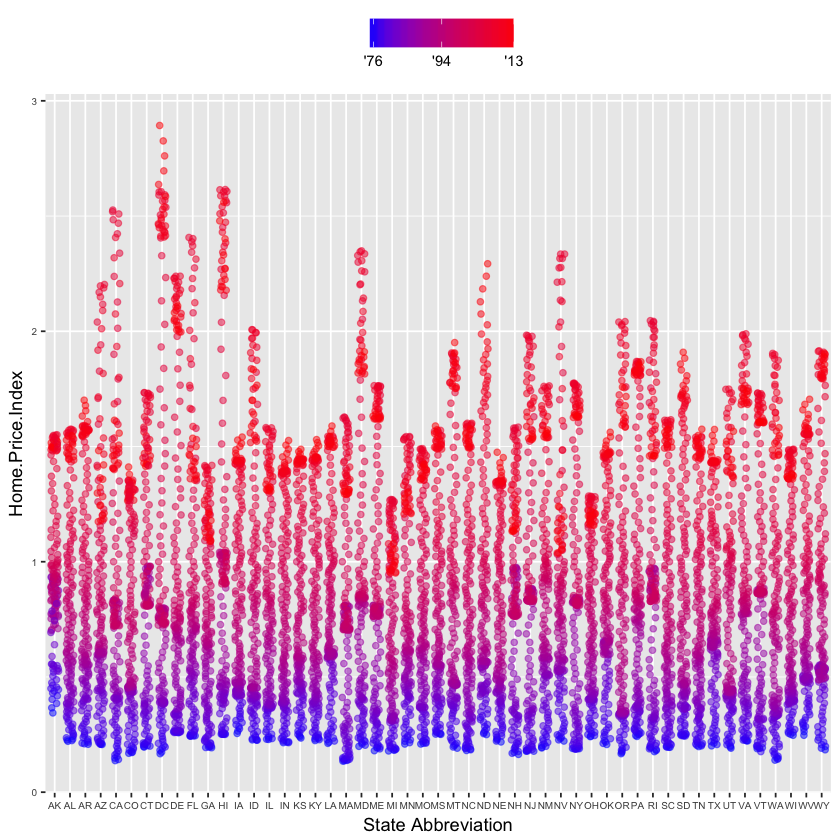

In [61]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

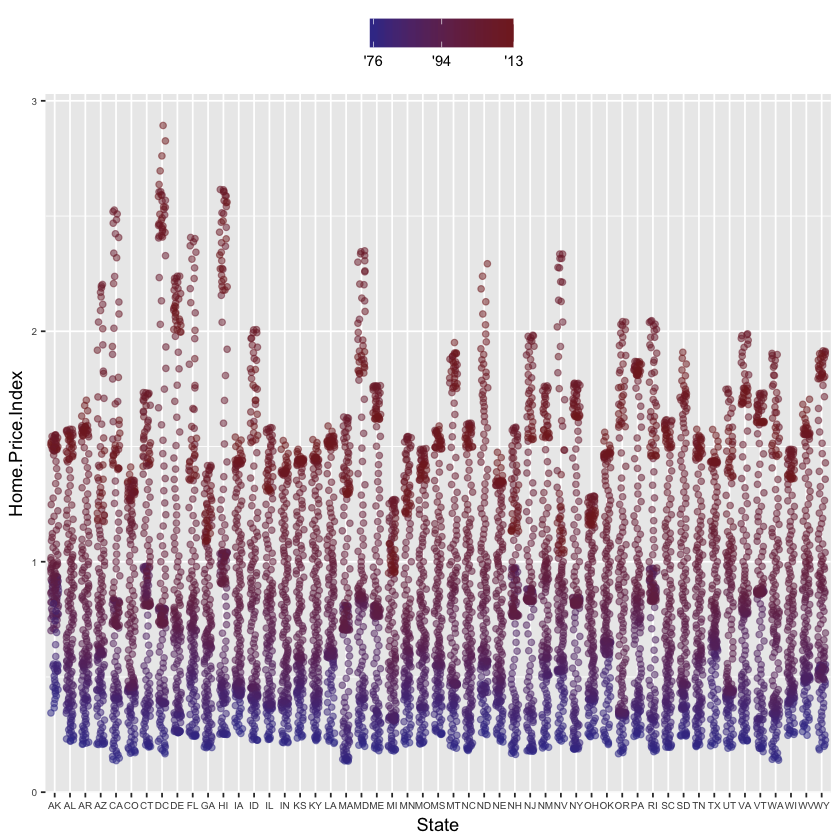

In [79]:
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))

In [73]:
?ez

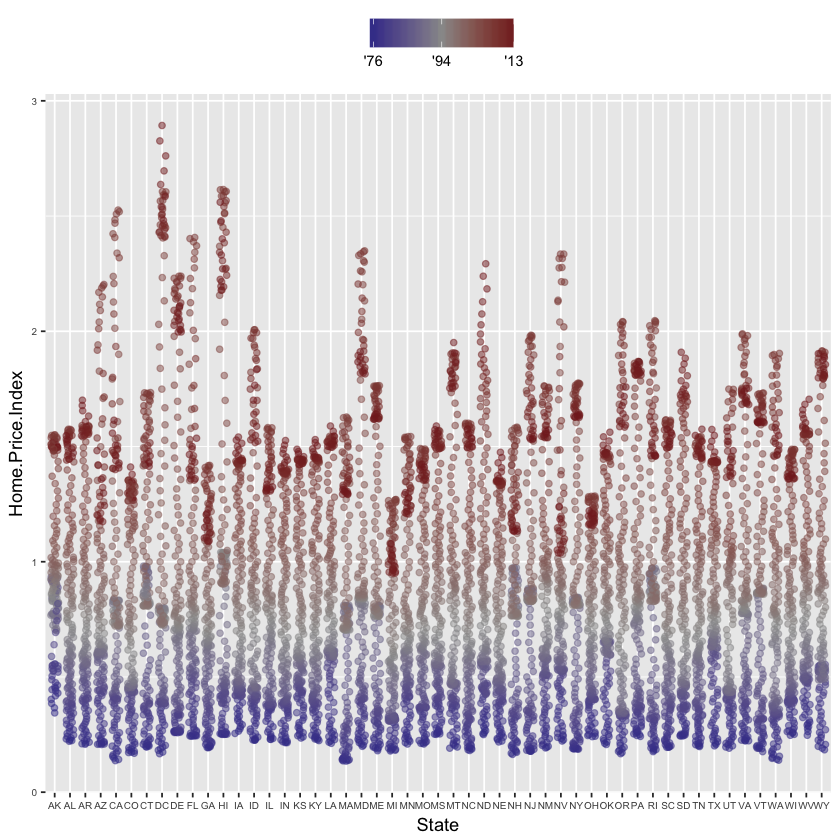

In [80]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = muted("blue"),
                        high = muted("red"),
                        mid = "gray60",
                        midpoint = 1994)

Faceting

What is the trend in housing prices in each state?

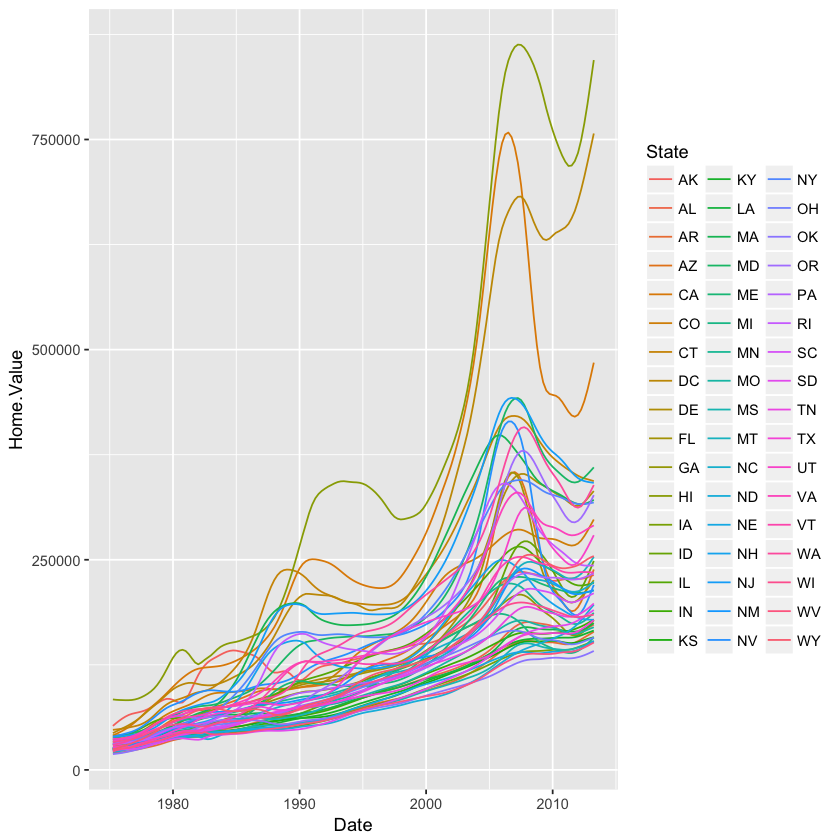

In [81]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

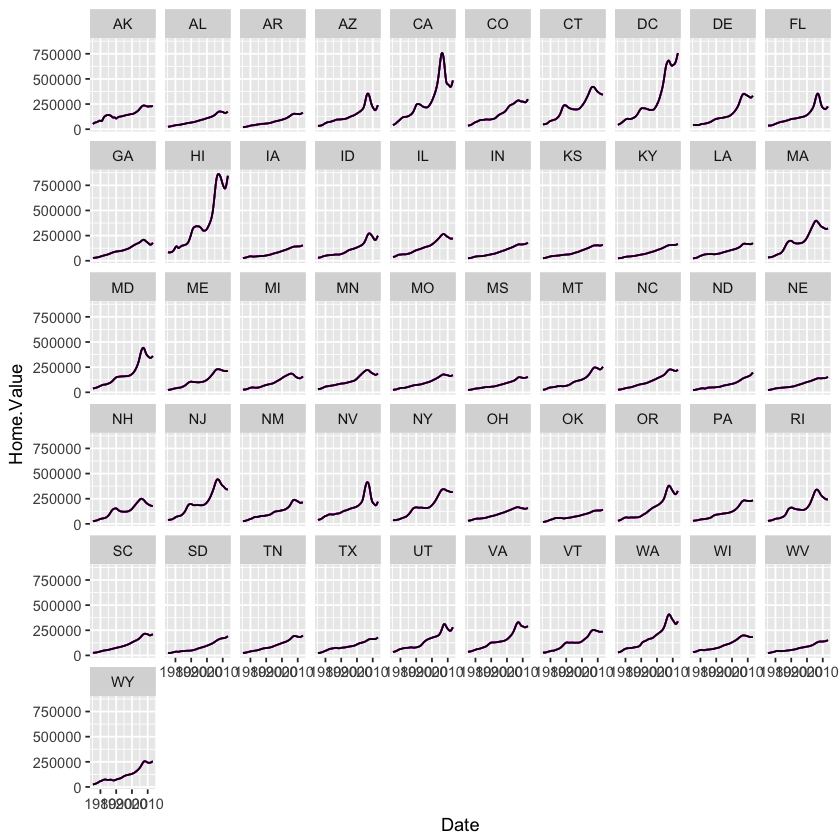

In [93]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

Themes

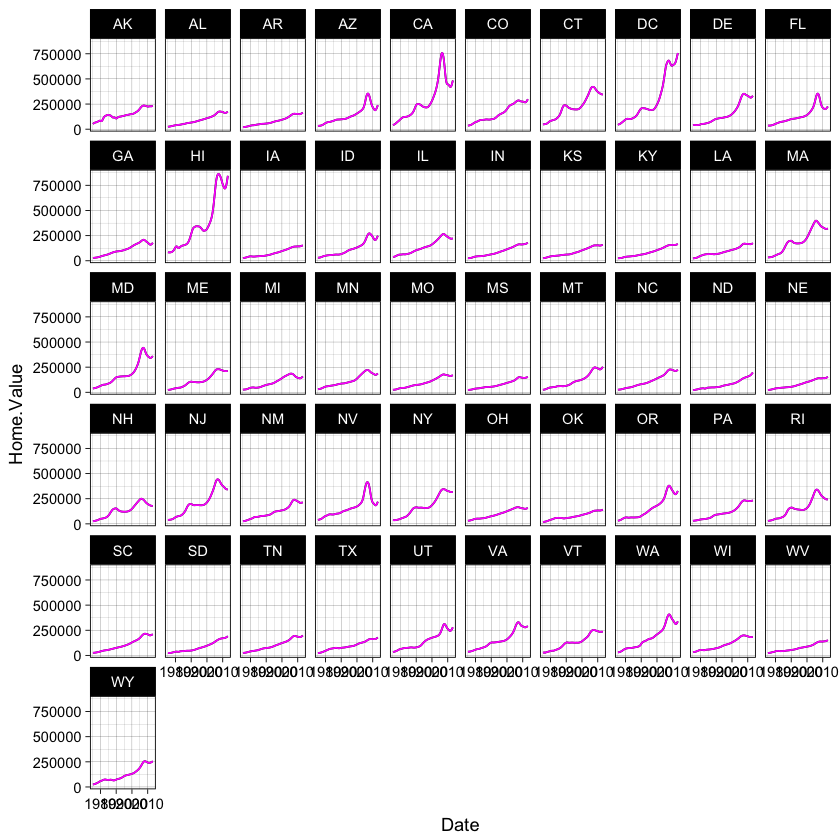

In [84]:
p5 + theme_linedraw()

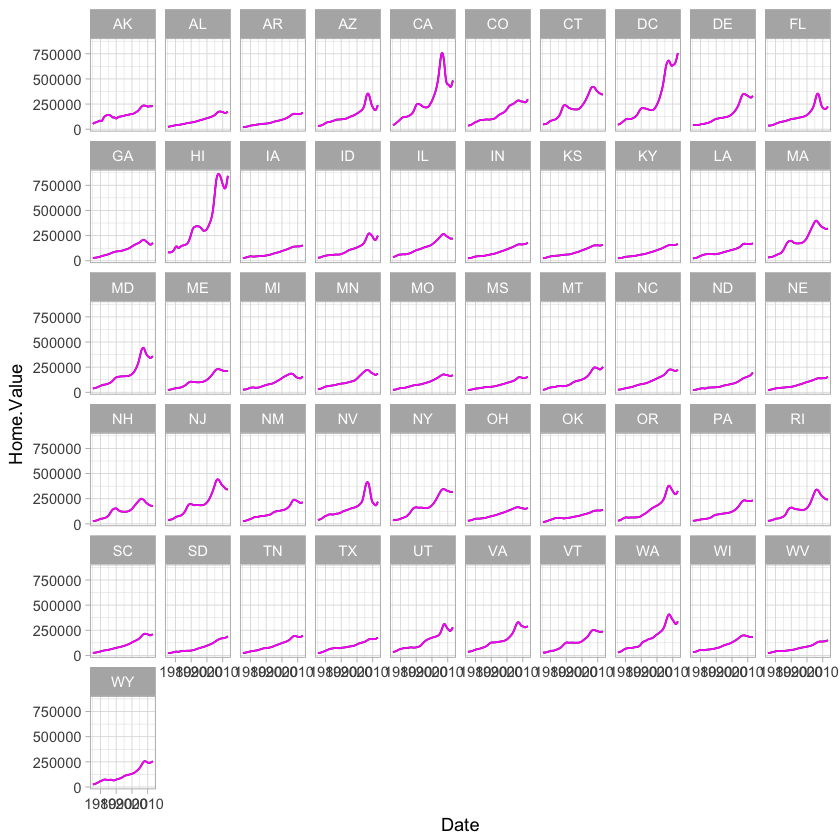

In [85]:
p5 + theme_light()

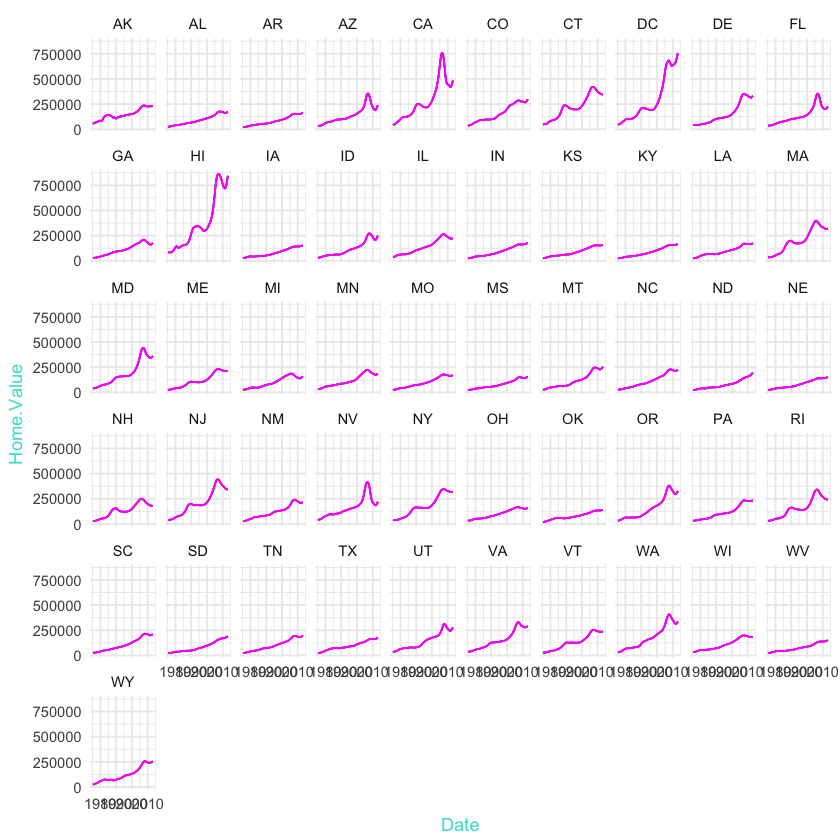

In [88]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

In [100]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Times New Roman", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = muted("orange")))



Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Times New Roman' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Times New Roman' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Times New Roman' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Times New Roman' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Times New Roman' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Times New Roman' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family

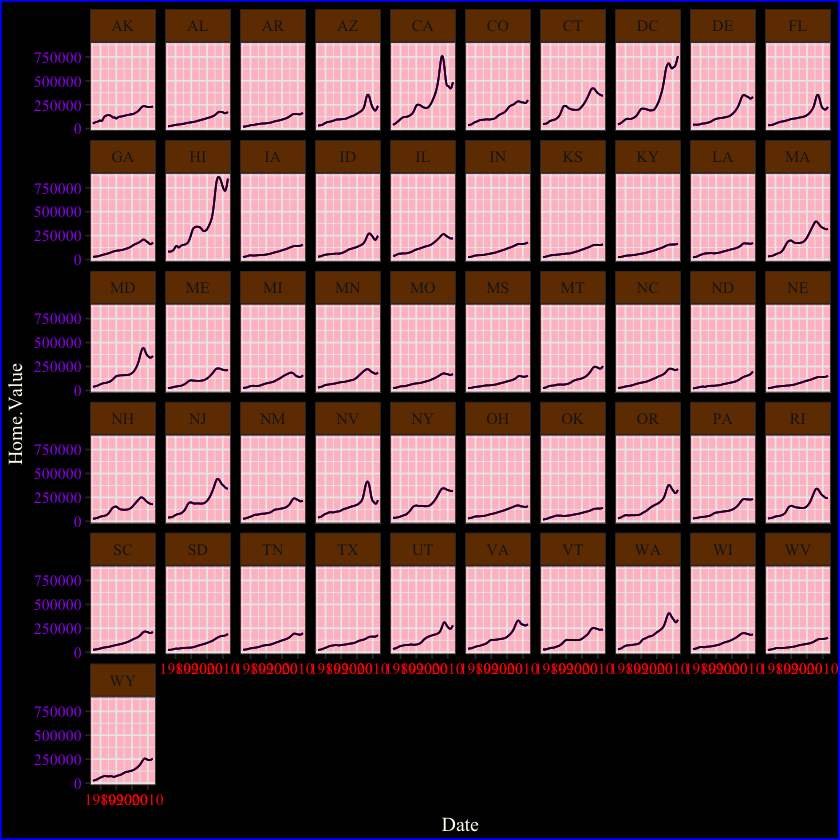

In [101]:
p5+theme_new

Map Aesthetic To Different Columns-Illustrating the wron amd right method

In [110]:
housing$Year

[1] 2010 2010 2009 2009 2007 2008 2008 2008 2008 2009 2009 1985 1985 1985
  [15] 1986 1986 1986 1986 1987 1987 1987 1987 1988 1988 1988 1988 1989 1989
  [29] 1989 2010 2010 2011 2011 2011 2011 2012 2012 2012 2012 2013 1982 1982
  [43] 1983 1983 1983 1983 1984 1984 1984 1984 1985 1995 1995 1995 1996 1996
  [57] 1996 1996 1997 1997 1997 1997 1998 1998 1998 1998 1999 1999 1999 1989
  [71] 1990 1990 1990 1990 1991 1991 1991 1991 1992 1992 1992 1992 1993 1993
  [85] 1993 1993 1994 1994 1994 1994 1995 1975 1975 1975 1975 1976 1976 1976
  [99] 1976 1977 1977 1977 1977 1978 1978 1978 1978 1979 1979 1979 1979 1980
 [113] 1980 1980 1980 1981 1981 1981 1981 1982 1982 2002 2002 2003 2003 2003
 [127] 2003 2004 2004 2004 2004 2005 2005 2005 2005 2006 2006 2006 2006 2007
 [141] 2007 2007 2001 2001 2001 2001 2002 2002 2000 2000 1999 2000 2000 1975
 [155] 1975 1976 1976 1976 1976 1977 1977 1975 1975 1985 1985 1986 1986 1986
 [169] 1986 1987 1987 1987 1987 1988 1988 1988 1988 1989 1989 1989 1989 1990
 [183] 1990 1990 1990 1991 1991 1991 1991 1992 1992 1992 1992 1993 1993 1993
 [197] 1993 1994 1994 1994 1994 1995 1995 1995 1995 1996 1996 1996 1996 1997
 [211] 1997 1997 1997 1998 1998 1998 1998 1999 1999 1999 1999 2000 2000 2000
 [225] 2000 2001 2001 2001 2001 2002 2002 2002 2002 2003 2003 2003 2003 2004
 [239] 2004 2004 2004 2005 2005 2005 2005 2006 2006 2006 2006 2007 2007 2007
 [253] 1977 1977 1978 1978 1978 1978 1979 1979 1979 1979 1980 1980 1980 1980
 [267] 1981 1981 1981 1981 1982 1982 1982 1982 1983 1983 1983 1983 1984 1984
 [281] 1984 1984 1985 1985 2008 2008 2008 2009 2009 2009 2009 2010 2010 2010
 [295] 2010 2007 2008 2011 2011 2012 2012 2012 2012 2013 2011 2011 1983 1982
 [309] 1982 1982 1984 1983 1983 1983 1975 1975 1975 1975 1976 1976 1976 1976
 [323] 1977 1977 1977 1977 1978 1978 1978 1978 1979 1979 1979 1979 1980 1980
 [337] 1980 1980 1981 1981 1981 1981 1982 1992 1992 1992 1992 1993 1993 1993
 [351] 1993 1994 1994 1994 1994 1995 1995 1995 1995 1996 1996 1996 1996 1997
 [365] 1997 1997 1997 1998 1998 1998 1998 1999 1999 1999 1999 2000 2000 2000
 [379] 2000 2001 2001 2001 2001 2002 2002 2002 2002 2003 2003 2003 2003 2004
 [393] 2004 2004 2004 2005 2005 2005 2005 2006 2006 2006 2006 2007 2007 2007
 [407] 2007 2008 2008 2008 2008 2009 2009 2009 2009 2010 2010 2010 2010 2011
 [421] 2011 2011 2011 2012 2012 2012 2012 2013 1986 1986 1986 1987 1987 1984
 [435] 1984 1984 1985 1985 1985 1985 1986 1989 1989 1990 1990 1990 1987 1987
 [449] 1988 1988 1988 1988 1989 1989 1991 1990 1991 1991 1991 1981 1982 1980
 [463] 1980 1980 1981 1981 1981 1975 1975 1975 1975 1976 1976 1976 1976 1977
 [477] 1977 1977 1977 1978 1978 1978 1978 1979 1979 1979 1979 1980 1990 1990
 [491] 1990 1991 1991 1991 1991 1992 1982 1982 1982 1983 1983 1983 1983 1984
 [505] 1984 1984 1984 1985 1985 1985 1985 1986 1986 1986 1986 1987 1987 1987
 [519] 1987 1988 1988 1988 1988 1989 1989 1989 1989 1990 2000 2000 2000 2001
 [533] 2001 2001 2001 2002 2002 2002 2002 2003 2003 2003 2003 2004 2004 2004
 [547] 2004 2005 2005 2005 2005 2006 2006 2006 2006 2007 2007 2007 2007 2008
 [561] 2008 2008 2008 2009 2009 2009 2009 2010 2010 2010 2010 2011 2011 2011
 [575] 2011 2012 2012 2012 2012 2013 1993 1993 1993 1993 1994 1994 1994 1994
 [589] 1995 1995 1995 1995 1996 1996 1996 1996 1997 1997 1997 1997 1998 1998
 [603] 1998 1998 1999 1999 1999 1999 2000 1992 1992 1992 2005 2006 2006 2006
 [617] 2005 1984 1984 1984 1985 1985 1985 1985 1986 1986 1986 1986 1987 1987
 [631] 1987 1987 1988 1988 1988 1988 1989 1989 1989 1989 1990 1990 1990 1990
 [645] 1991 1991 1991 1991 1992 1992 1992 1992 1993 1993 1993 1993 1994 1994
 [659] 1994 1994 1995 1995 1995 1995 1996 1996 1996 1996 1997 1997 1997 1997
 [673] 1998 1998 1998 1998 1999 1999 1999 1999 2000 2000 2000 2000 2001 2001
 [687] 2001 2001 2002 2002 2002 2002 2003 2003 2003 2003 2004 2004 2004 2004
 [701] 2005 2005 1975 1975 1975 1975 1976 2006 2007 2007 2007 2007 2008 2008
 [715] 2008 2008 2009 2009 2009 2009 2010 2010 2010 2010 2011 2011 2011 2011

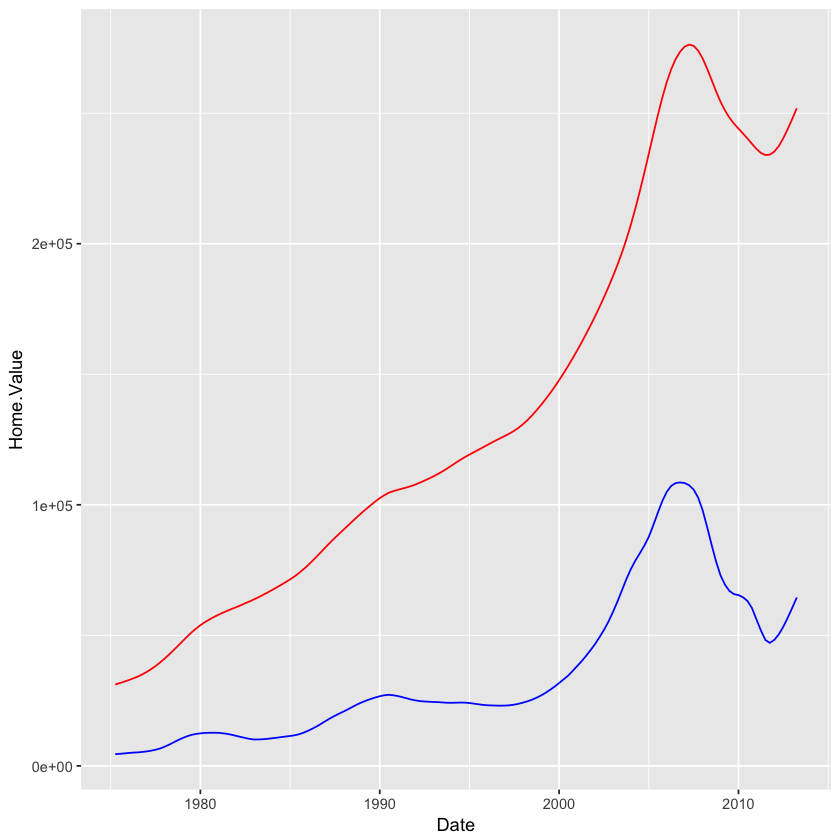

In [111]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")

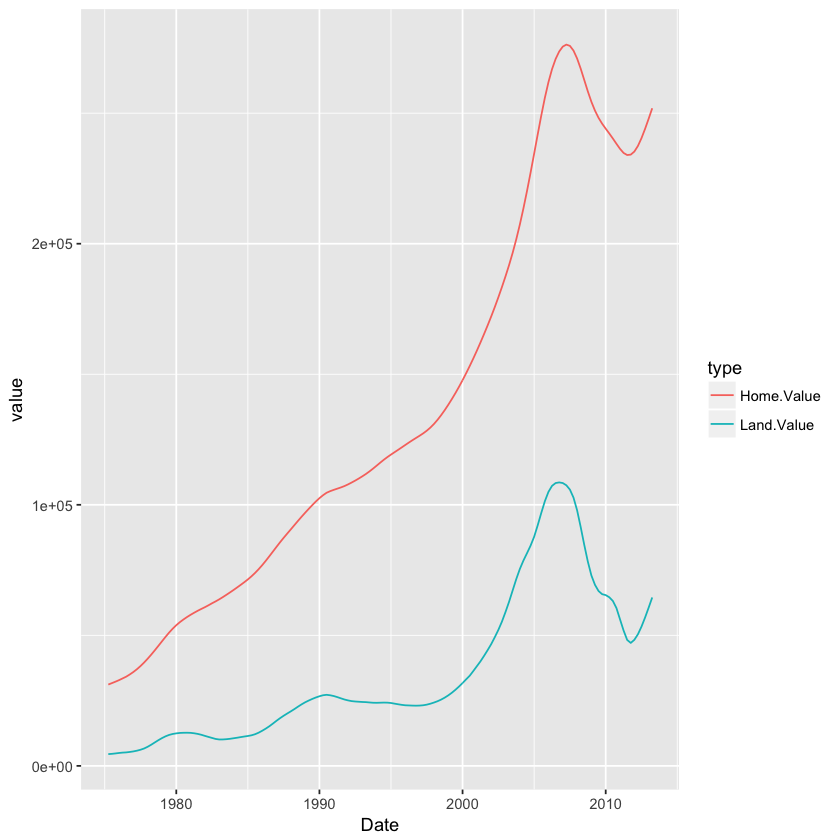

In [112]:
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()